### Introduction

Loan default prediction is of paramount importance in the financial industry as it plays a crucial role in mitigating risks and ensuring the stability of lending institutions. By harnessing advanced analytics and machine learning algorithms, financial institutions can assess the creditworthiness of potential borrowers more accurately. This proactive approach enables lenders to identify and flag high-risk individuals or businesses, reducing the likelihood of defaults. Predictive models analyze a numerous variables, such as credit history, income stability, loan premium, LTV etc. and providing a comprehensive evaluation of a borrower's ability to repay a loan. Timely prediction of loan defaults not only protects financial institutions from potential financial losses but also fosters responsible lending practices. Ultimately, the ability to forecast loan defaults empowers lenders to make informed decisions, maintain a healthy loan portfolio, and contribute to the overall stability of the financial system.

The note book covers the data clensing, handling missing values to preprocess data for model building process. Also basic exploratory data analysis of the dataset included in this notebook.

kaggle [dataset](https://www.kaggle.com/datasets/gauravduttakiit/bank-fears-loanliness) on loan portfolio status had been used to develop the predictive model.

### Imported required packages

In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


import matplotlib.pyplot as plt
import seaborn as sns

### Define Function

Function is define to use iteratively to identify data distribution and basic parameters mean, median and mode.

In [2]:
def missingval(data,bins=50):

    '''
    This will print histogram with the variable statstics of mean, median and mode.
    
    Parameters :

    data - respective variable
    bins - no of bins in the histogram

    '''
    
    plt.hist(data, bins=50, edgecolor='black')
    plt.xticks()
    plt.xlabel('Value Range')
    plt.ylabel('Frequency')
    plt.title('Histogram of Your Data')
    plt.xlim(data.min(), data.max())
    plt.show()
    
    mean = data.mean()
    median = data.median()
    mode = data.mode()
    max = data.max()
    
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Mode: {mode}')
    print(f'Max: {max}')
    

In [3]:
df = pd.read_csv('Data/Loan_Default.csv', index_col=0)

In [4]:
df.shape

(532428, 44)

In [5]:
df['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 58189336 to 46122259
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    532428 non-null  int64  
 1   funded_amnt                  532428 non-null  int64  
 2   funded_amnt_inv              532428 non-null  float64
 3   term                         532428 non-null  object 
 4   batch_enrolled               447279 non-null  object 
 5   int_rate                     532428 non-null  float64
 6   grade                        532428 non-null  object 
 7   sub_grade                    532428 non-null  object 
 8   emp_title                    501595 non-null  object 
 9   emp_length                   505537 non-null  object 
 10  home_ownership               532428 non-null  object 
 11  annual_inc                   532425 non-null  float64
 12  verification_status          532428 non-null  obj

In [7]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal   

There are missing values in many columns and need to identify the different strategies to identify missing values.  

In [8]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


### Clense term column

In [9]:
df['term'].value_counts()

36 months    372793
60 months    159635
Name: term, dtype: int64

Removing months word from the dataframe

In [10]:
df['term']=pd.to_numeric(df['term'].str.replace('months',''))

### Clense emp_length column

In [11]:
df['emp_length'].value_counts()

10+ years    175105
2 years       47276
< 1 year      42253
3 years       42175
1 year        34202
5 years       33393
4 years       31581
7 years       26680
8 years       26443
6 years       25741
9 years       20688
Name: emp_length, dtype: int64

In [12]:
df['emp_length']=df['emp_length'].replace({ '< 1 year':0, '2 years':2, '5 years':5,
       '8 years':8, '7 years':7, '4 years':4,  '1 year':1, '3 years':3,
       '6 years':6,'9 years':9,'10+ years':10})

Encode employment length to numeric.

In [13]:
df['emp_length'].describe()

count    505537.000000
mean          6.010559
std           3.665448
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

### Imputation Strategy for Missing Values of batch_enrolled

In [14]:
df['batch_enrolled'].value_counts()

              106079
BAT2252229     18791
BAT3873588     17839
BAT2803411     17111
BAT2078974     14859
               ...  
BAT4347689        30
BAT4884699        29
BAT5869156        26
BAT5077496        18
BAT2331079        13
Name: batch_enrolled, Length: 104, dtype: int64

The imputation strategy for batch enroolled to be used as most common.

### Missing Values of emp_title and emp_length

As these emp_title and emp_length are personalized charactoristics cannot impute using other values. Therefore those records to be removed from the data frame.

In [15]:
df = df.dropna(subset=['emp_title','emp_length'])

### Missing Values in desc and verification_status_joint columns

As there are high % of missing values in both the columns, dropping those columns from the dataframe.

In [16]:
df = df.drop(['desc','verification_status_joint'], axis=1)

### Missing Values in title, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, revol_util, total_acc,collections_12_mths_ex_med and acc_now_delinq

As those columns contains decimal percentage of missing values those records removed from the database.

In [17]:
df = df.dropna(subset=['title', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc','collections_12_mths_ex_med', 'acc_now_delinq'])

In [18]:
df.shape

(500955, 42)

### Imputation Strategy for Missing Values of mths_since_last_delinq

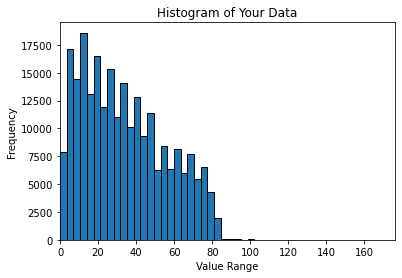

Mean: 33.91602115693845
Median: 31.0
Mode: 0    9.0
dtype: float64
Max: 176.0


In [19]:
missingval(df['mths_since_last_delinq'])

As distribution is skewed appropriate to use median as the imputation strategy

### Imputation Strategy for Missing Values of mths_since_last_record

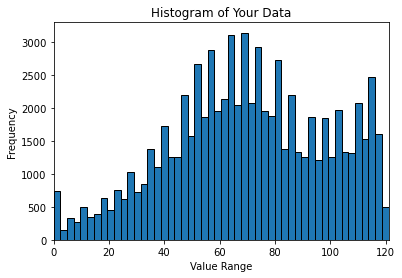

Mean: 70.04104432626488
Median: 70.0
Mode: 0    61.0
dtype: float64
Max: 121.0


In [20]:
missingval(df['mths_since_last_record'])

As distribution is skewed appropriate to use median as the imputation strategy

### Imputation Strategy for Missing Values of mths_since_last_major_derog

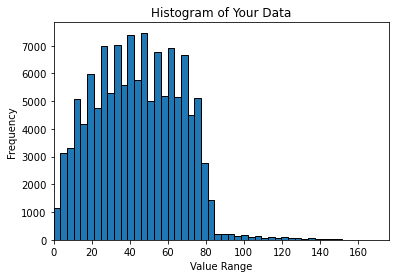

Mean: 44.06562710884026
Median: 44.0
Mode: 0    45.0
dtype: float64
Max: 176.0


In [21]:
missingval(df['mths_since_last_major_derog'])

As distribution is skewed appropriate to use median as the imputation strategy

### Imputation Strategy for Missing Values of tot_coll_amt,tot_cur_bal,total_rev_hi_lim

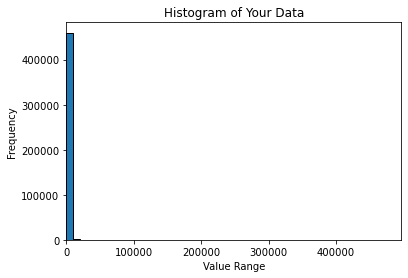

Mean: 208.84810162223042
Median: 0.0
Mode: 0    0.0
dtype: float64
Max: 496651.0


In [22]:
missingval(df['tot_coll_amt'])

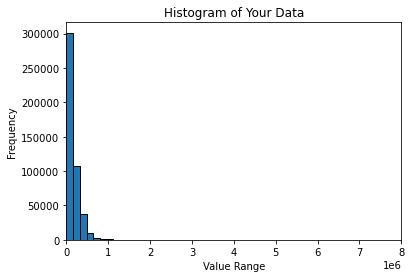

Mean: 141952.08457473305
Median: 83728.5
Mode: 0    0.0
dtype: float64
Max: 8000078.0


In [23]:
missingval(df['tot_cur_bal'])

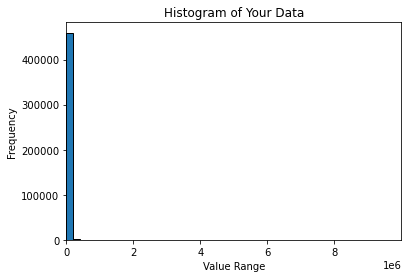

Mean: 32231.664891382035
Median: 23900.0
Mode: 0    13500.0
dtype: float64
Max: 9999999.0


In [24]:
missingval(df['total_rev_hi_lim'])

As above distributions does not fall into proper distribution, imputation strategy would be to use mode

### Basic EDA of the Dataset

Defining the categorical and numeric columns

In [25]:
column_category=df.select_dtypes(include=['object']).columns
print(column_category)

Index(['batch_enrolled', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'initial_list_status', 'application_type',
       'last_week_pay'],
      dtype='object')


In [26]:
column_numerical = df.select_dtypes(include=np.number).columns.tolist()
print(column_numerical)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']


### For respective numeric variable identify the descriptive statistics

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,500955.0,14916.003833,8441.327330,500.00,8400.00,13200.00,20000.000,35000.00
funded_amnt,500955.0,14902.721602,8436.368545,500.00,8325.00,13200.00,20000.000,35000.00
funded_amnt_inv,500955.0,14863.647360,8448.442522,0.00,8200.00,13150.00,20000.000,35000.00
term,500955.0,43.358266,11.065918,36.00,36.00,36.00,60.000,60.00
int_rate,500955.0,13.236167,4.381960,5.32,9.99,12.99,16.200,28.99
emp_length,500955.0,6.008470,3.665316,0.00,3.00,6.00,10.000,10.00
annual_inc,500955.0,76209.931059,65976.277091,1896.00,47000.00,65000.00,90000.000,9500000.00
dti,500955.0,18.099517,8.275468,0.00,11.93,17.62,23.860,380.53
delinq_2yrs,500955.0,0.317649,0.863698,0.00,0.00,0.00,0.000,30.00
inq_last_6mths,500955.0,0.694054,0.996455,0.00,0.00,0.00,1.000,31.00


### Identify composition of categorical variables

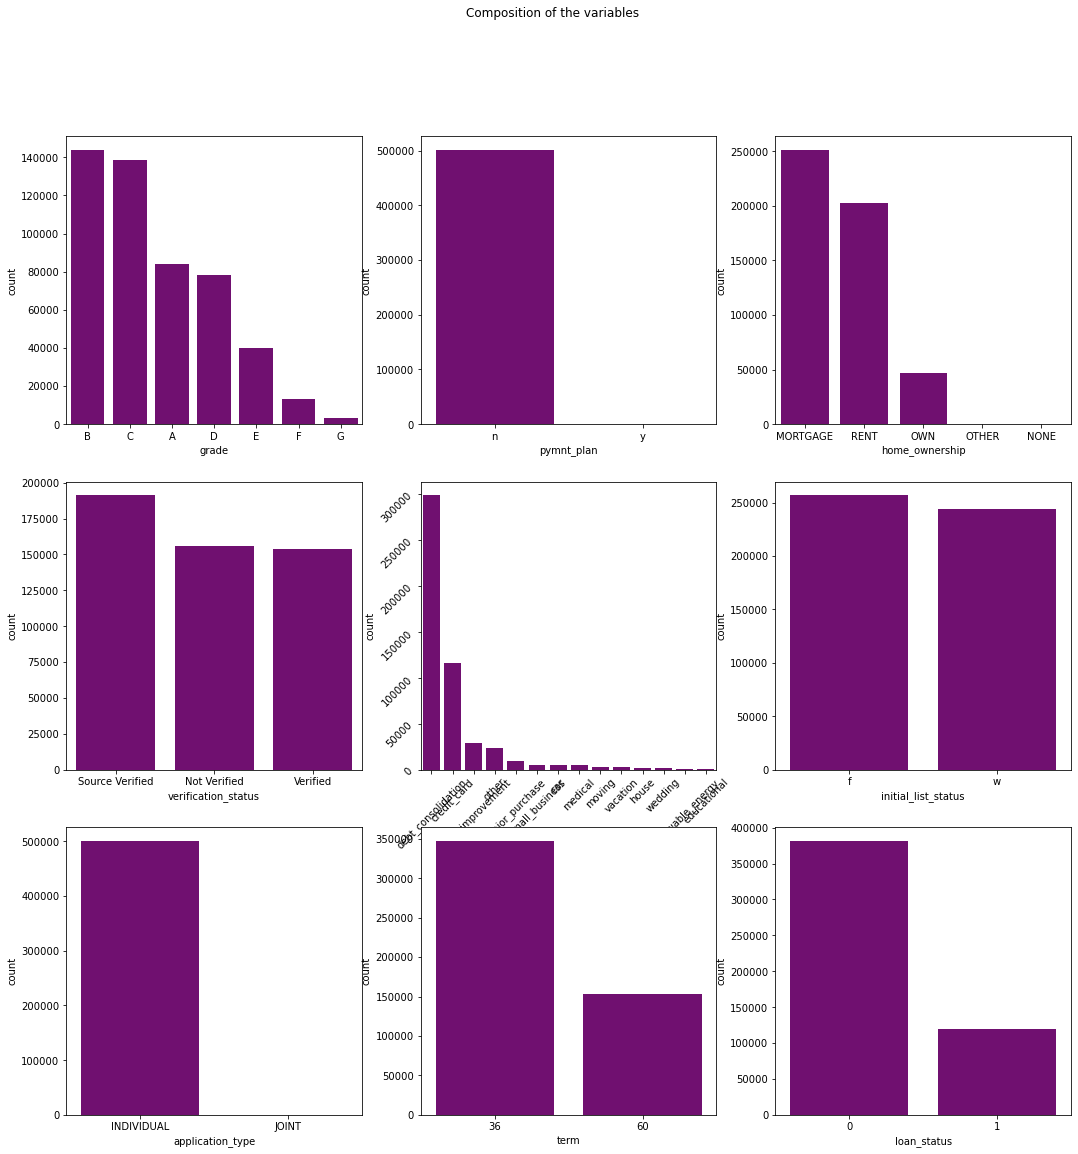

In [28]:
fig, axes = plt.subplots(3, 3, figsize = (18, 18))
fig.suptitle('Composition of the variables')
sns.countplot(ax = axes[0, 0], x = 'grade', data = df, color = 'purple', 
              order = df['grade'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'pymnt_plan', data = df, color = 'purple', 
              order = df['pymnt_plan'].value_counts().index);
sns.countplot(ax = axes[0, 2], x = 'home_ownership', data = df, color = 'purple', 
              order = df['home_ownership'].value_counts().index[:5]);
sns.countplot(ax = axes[1, 0], x = 'verification_status', data = df, color = 'purple', 
              order = df['verification_status'].value_counts().index[:20]);
sns.countplot(ax = axes[1, 1], x = 'purpose', data = df, color = 'purple', 
              order = df['purpose'].value_counts().index);
sns.countplot(ax = axes[1, 2], x = 'initial_list_status', data = df, color = 'purple', 
              order = df['initial_list_status'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'application_type', data = df, color = 'purple', 
              order = df['application_type'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'term', data = df, color = 'purple', 
              order = df['term'].value_counts().index);
sns.countplot(ax = axes[2, 2], x = 'loan_status', data = df, color = 'purple', 
              order = df['loan_status'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);

By observing above plots it can be observed below

1. Grade : Majority of the observations B and C grades.
2. Payment plan : Majority observed as without a payment plan. Therefore Composition is biased.
3. Home ownership : Other and None categories contains small percentage of records.
4. Verification status : about 30% of the status of income has not verified.
5. Purpose : There are many categories with small no of observation.There could be a possibility of consolidation of categories.
6. Initial listing status : both f and w categories are evenly distributed.
7. Application type : Majority of the observations are individual applicants.
8. Term : Majority of the loans are for 36 months
9. loan status : In the dataset contains about 25% of the observations with defaulted.

### Clensing Home Ownership Column

In [29]:
df['home_ownership'].value_counts()

MORTGAGE    251136
RENT        202662
OWN          47014
OTHER          110
NONE            30
ANY              3
Name: home_ownership, dtype: int64

In [30]:
valid_home_ownership = ['MORTGAGE', 'RENT', 'OWN']
df = df[df['home_ownership'].isin(valid_home_ownership)]

As 'Other', 'Any' and 'None' contains about 0.02% records those removed from the data frame.

In [31]:
df['home_ownership'].value_counts()

MORTGAGE    251136
RENT        202662
OWN          47014
Name: home_ownership, dtype: int64

### Clensing Purpose Column

In [32]:
df['purpose'].value_counts()

debt_consolidation    298255
credit_card           116060
home_improvement       28679
other                  23665
major_purchase          9601
small_business          5350
car                     4959
medical                 4690
moving                  3011
vacation                2593
house                   2054
wedding                 1364
renewable_energy         305
educational              226
Name: purpose, dtype: int64

The purpose column was clensed based on the composition combining the categories duplicated and containing small no of responses mapping to a common category. 

In [33]:
df['purpose']=df['purpose'].replace({ 'house':'home_improvement', 'renewable_energy':'other','educational':'other', 'vacation':'entertainment','wedding':'entertainment','car':'major_purchase'})

In [34]:
df['purpose'].value_counts()

debt_consolidation    298255
credit_card           116060
home_improvement       30733
other                  24196
major_purchase         14560
small_business          5350
medical                 4690
entertainment           3957
moving                  3011
Name: purpose, dtype: int64

### Relationship between Numeric Variables

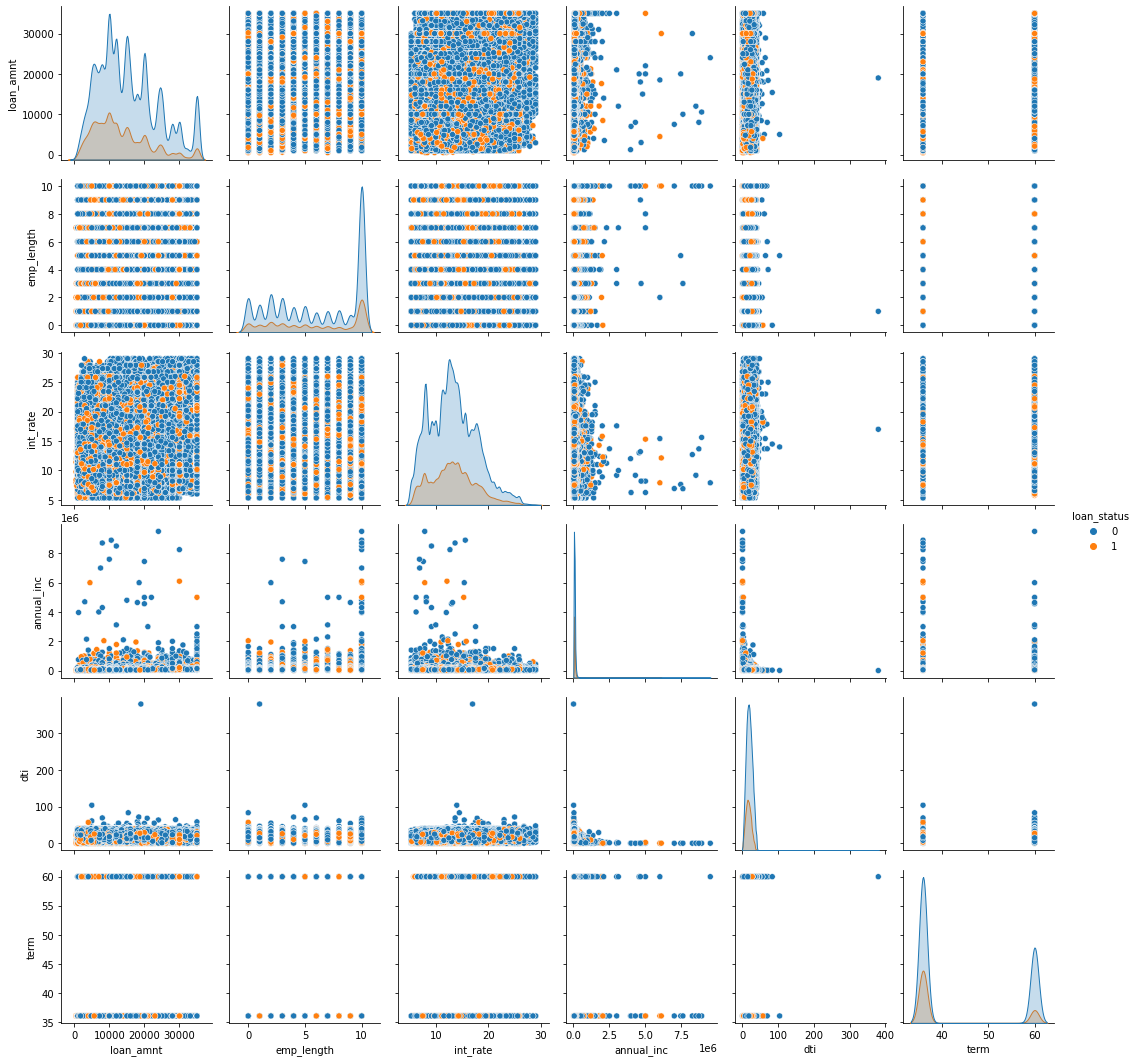

In [37]:
data_temp = df[['loan_amnt','emp_length','int_rate', 'annual_inc','dti','term','loan_status']]
sns.pairplot(data_temp, hue='loan_status',height=2.5);
plt.show();

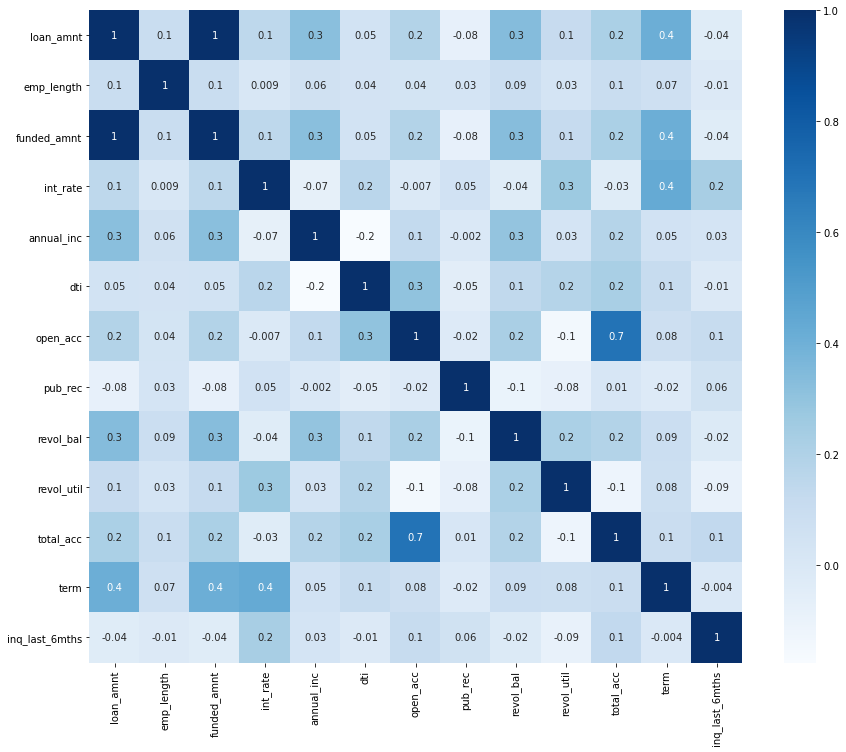

In [39]:
corr_mat = df[['loan_amnt','emp_length','funded_amnt','int_rate', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','term','inq_last_6mths']].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Only funded amound against loan amount shows significant correlation.

### Imputations using pipelines

In [35]:
nummedian = ['mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq']
nummode =['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [36]:
catcols = ['batch_enrolled']

Split the data frame to train and test subsets

In [37]:
X = df.drop('loan_status', axis =1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =42,test_size = 0.25)

In [38]:
subpipe_median =Pipeline(steps =[    
    ('Impute',SimpleImputer(strategy='median'))
])
    
subpipe_cat =Pipeline([
    ('Impute',SimpleImputer(strategy='most_frequent'))
])

In [39]:
CT = ColumnTransformer(transformers=[
    ('subpipe_mode', subpipe_cat,nummode),
    ('subpipe_median', subpipe_median,nummedian),
    ('subpipe_cat', subpipe_cat,catcols)
],remainder='passthrough',verbose_feature_names_out=False)

In [40]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  80017
int_rate                            0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
purpose                             0
title                               0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         255863
mths_since_last_record         426166
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util  

### After imputing missing values convert X_train data to a dataframe for other calculations

In [41]:
CT.set_output(transform='pandas')
X_train_trans = CT.fit_transform(X_train)
X_train_trans

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq
member_id,,,,,,,,,,,,,,,,,,,,,
1485851,0.0,0.0,15000.0,44.0,70.0,31.0,BAT3372536,24000,24000,24000.0,...,17.0,f,5223.84,0.0,1267.46,11.670,0.0,INDIVIDUAL,61th week,0.0
59728839,0.0,448556.0,153900.0,44.0,70.0,31.0,BAT3873588,25000,25000,25000.0,...,45.0,w,563.74,0.0,0.00,0.000,0.0,INDIVIDUAL,22th week,0.0
26348727,0.0,18255.0,37300.0,44.0,70.0,31.0,BAT2333412,11200,11200,11200.0,...,18.0,w,1060.67,0.0,0.00,0.000,0.0,INDIVIDUAL,74th week,0.0
53714022,0.0,65274.0,49800.0,54.0,70.0,28.0,BAT1184694,15000,15000,15000.0,...,24.0,w,498.95,0.0,0.00,0.000,0.0,INDIVIDUAL,31th week,0.0
56449016,0.0,365694.0,19200.0,44.0,70.0,3.0,BAT3873588,10000,10000,10000.0,...,24.0,f,264.32,0.0,0.00,0.000,0.0,INDIVIDUAL,13th week,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745869,0.0,240046.0,12500.0,30.0,70.0,26.0,BAT4351734,20675,20675,20675.0,...,10.0,w,3205.65,0.0,0.00,0.000,0.0,INDIVIDUAL,43th week,0.0
64393725,0.0,82413.0,36800.0,44.0,70.0,31.0,BAT4271519,12000,12000,12000.0,...,22.0,w,298.59,0.0,0.00,0.000,0.0,INDIVIDUAL,17th week,0.0
55259366,0.0,57347.0,43500.0,44.0,70.0,31.0,,16000,16000,16000.0,...,9.0,f,1262.86,0.0,0.00,0.000,0.0,INDIVIDUAL,31th week,0.0


### After imputing missing values convert X_test data to a dataframe for other calculations

In [42]:
CT.set_output(transform='pandas')
X_test_trans = CT.fit_transform(X_test)
X_test_trans

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq
member_id,,,,,,,,,,,,,,,,,,,,,
32157702,0.0,68305.0,21900.0,44.0,70.0,7.0,BAT2078974,2000,2000,2000.0,...,23.0,f,277.97,0.0,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0
59571650,0.0,36306.0,10500.0,50.0,37.0,50.0,BAT3873588,10000,10000,10000.0,...,29.0,w,283.29,0.0,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0
33338943,0.0,15866.0,38640.0,98.0,70.0,57.0,BAT2078974,15000,15000,15000.0,...,44.0,w,2482.09,0.0,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0
19767045,0.0,153926.0,7000.0,50.0,70.0,50.0,BAT3461431,6500,6500,6500.0,...,25.0,w,709.67,0.0,0.0,0.0,0.0,INDIVIDUAL,56th week,0.0
1332598,0.0,0.0,10000.0,44.0,70.0,35.0,BAT5046385,7875,7875,7875.0,...,22.0,f,1986.65,0.0,0.0,0.0,0.0,INDIVIDUAL,157th week,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34792396,0.0,10799.0,21900.0,44.0,29.0,30.0,BAT2558388,10000,10000,10000.0,...,18.0,w,2049.71,0.0,0.0,0.0,0.0,INDIVIDUAL,61th week,0.0
22170414,0.0,143864.0,80700.0,44.0,70.0,29.0,,26000,26000,26000.0,...,38.0,f,4047.69,0.0,0.0,0.0,0.0,INDIVIDUAL,78th week,0.0
53722204,0.0,38398.0,28900.0,44.0,70.0,30.0,,23600,23600,23575.0,...,16.0,f,2055.35,0.0,0.0,0.0,0.0,INDIVIDUAL,35th week,0.0


Combining X,y to df_train and df_test dataframes

In [43]:
df_train = pd.concat([X_train_trans,y_train],axis=1)
df_test = pd.concat([X_test_trans,y_test],axis=1)

### Feature Engineering

### Calculate Annual Total Loan Premium for X_train and X_test

Calculate annual loan premium using numf.pmt method.

In [60]:
df_train['Annual_Total_premium'] = npf.pmt(df_train['int_rate']/(12*100), df_train['term'], df_train['loan_amnt'])*-1*12

In [61]:
df_test['Annual_Total_premium'] = npf.pmt(df_test['int_rate']/(12*100), df_test['term'], df_test['loan_amnt'])*-1*12

Calculate annual total premium to annual income ratio

In [62]:
df_train['PTI']=df_train['Annual_Total_premium']/df_train['annual_inc']

In [63]:
df_test['PTI']=df_test['Annual_Total_premium']/df_test['annual_inc']

In [64]:
df_train['PTI'].max()

0.43298644126188285

In [65]:
df_train.shape

(375608, 45)

Cleansing PTI column, where PMI column greater than 1 is not possible. If greater than 1 means that loan premium is greater than the income. These impossible scenarios to remove from the dataframe.

In [51]:
df_train = df_train[df_train['PTI']<1]

In [52]:
df_test = df_test[df_test['PTI']<1]

Calculate Loan amount to Annual Income 

In [53]:
df_test['LTI']=df_test['loan_amnt']/df_test['annual_inc']

In [54]:
df_train['LTI']=df_train['loan_amnt']/df_train['annual_inc']

In [55]:
df_train.shape

(375608, 45)

In [56]:
df_test.shape

(125203, 45)

### Composition of Target Column

In [57]:
df_train['loan_status'].value_counts()

0    285984
1     89624
Name: loan_status, dtype: int64

In [58]:
df_test['loan_status'].value_counts()

0    95692
1    29511
Name: loan_status, dtype: int64

### Save test and train dataframes to use for model building

Train and test data frames export to Data folder to use in the machine learning modeling process

In [66]:
df_train.to_csv('Data/Loan_Default_train_cleaned.csv')

In [67]:
df_test.to_csv('Data/Loan_Default_test_cleaned.csv')